In [ ]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import itertools

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# optional
import warnings
warnings.filterwarnings('ignore')
plt.style.use('_mpl-gallery')



In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [4]:
# import dataset
data = pd.read_csv(r"C:\Users\Acer\Desktop\Project\customer_behaviour.csv") 
print(f"shape: {data.shape}")
data.head(23)

shape: (400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [7]:
df = pd.DataFrame(data)
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
# more details
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [11]:
df.describe(include=[object]).T

,count,unique,top,freq
Gender,400,2,Female,204


In [12]:
# Drop User ID columns
df.drop('User ID', axis=1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [36]:
# convert categoriacl feature to numerical:
# only Gender is categorical
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [0, 1])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [15]:
df.isna().sum()


Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

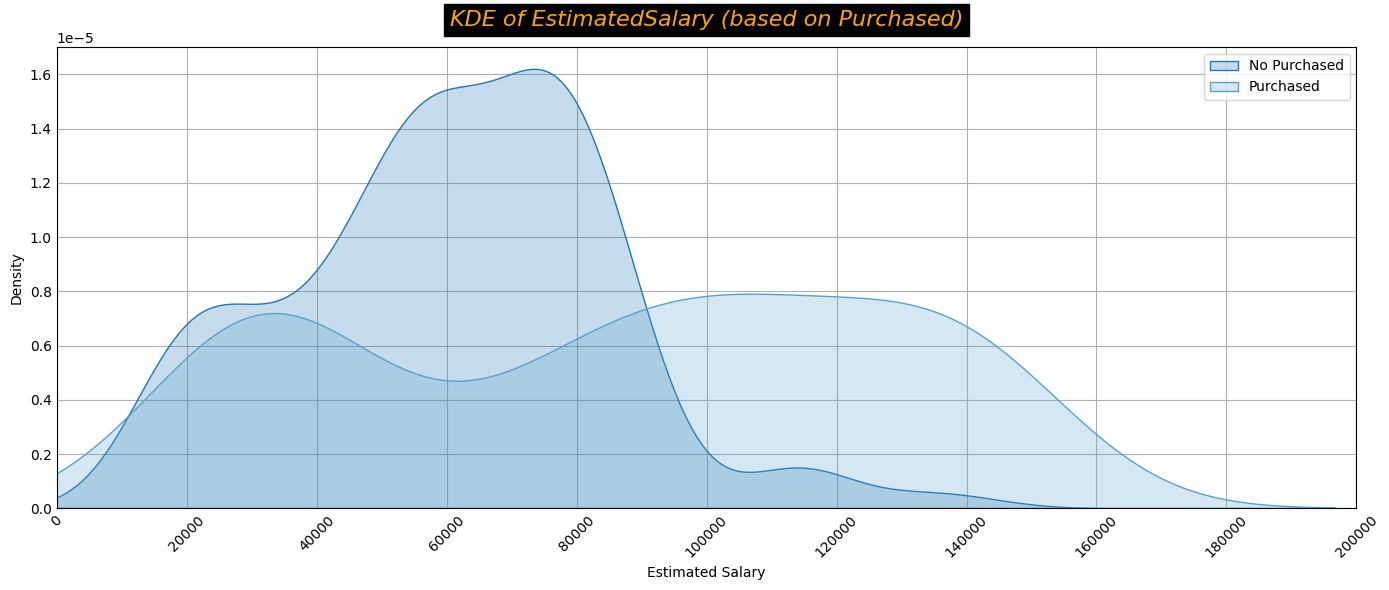

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# KDE plot of EstimatedSalary by Purchase status
plt.figure(figsize=(14, 6))
sns.kdeplot(data=df[df['Purchased'] == 0], x='EstimatedSalary', label='No Purchased', shade=True)
sns.kdeplot(data=df[df['Purchased'] == 1], x='EstimatedSalary', label='Purchased', shade=True)

plt.title('KDE of EstimatedSalary (based on Purchased)', fontsize=16, style='italic', color='orange', backgroundcolor='black', pad=15)
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.xticks(np.arange(0, 200001, 20000), rotation=45)
plt.xlim(0, 200000)
plt.legend()
plt.tight_layout()
plt.show()


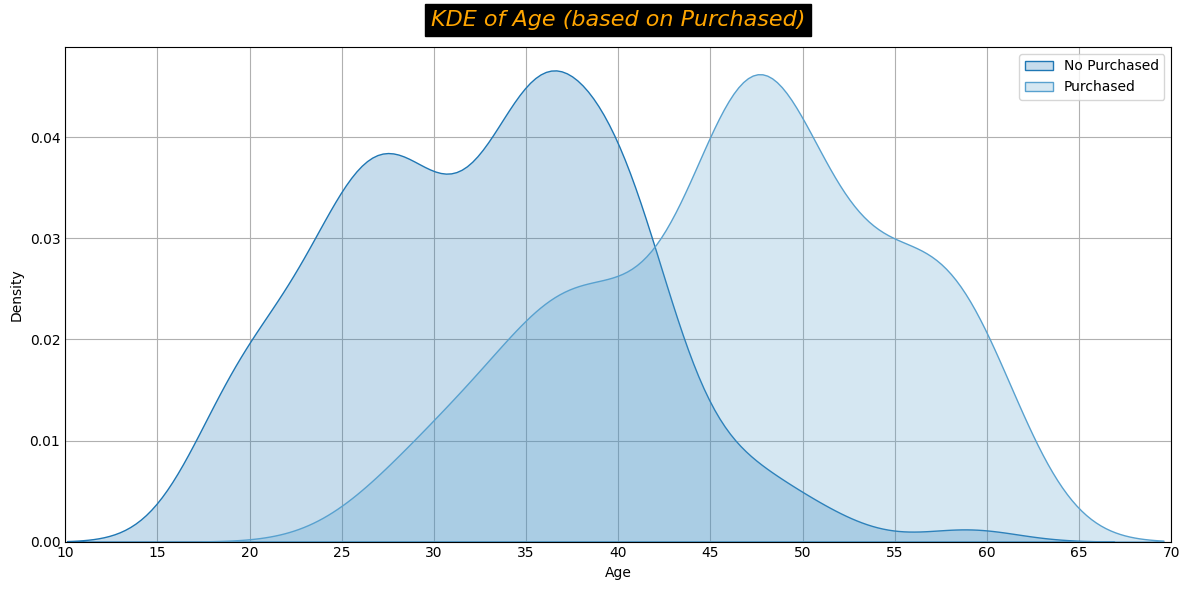

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# KDE plot of Age by Purchased
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Purchased'] == 0], x='Age', label='No Purchased', shade=True)
sns.kdeplot(data=df[df['Purchased'] == 1], x='Age', label='Purchased', shade=True)

plt.title('KDE of Age (based on Purchased)', fontsize=16, style='italic', color='orange', backgroundcolor='black', pad=15)
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(np.arange(10, 71, 5))
plt.xlim(10, 70)
plt.legend()
plt.tight_layout()
plt.show()


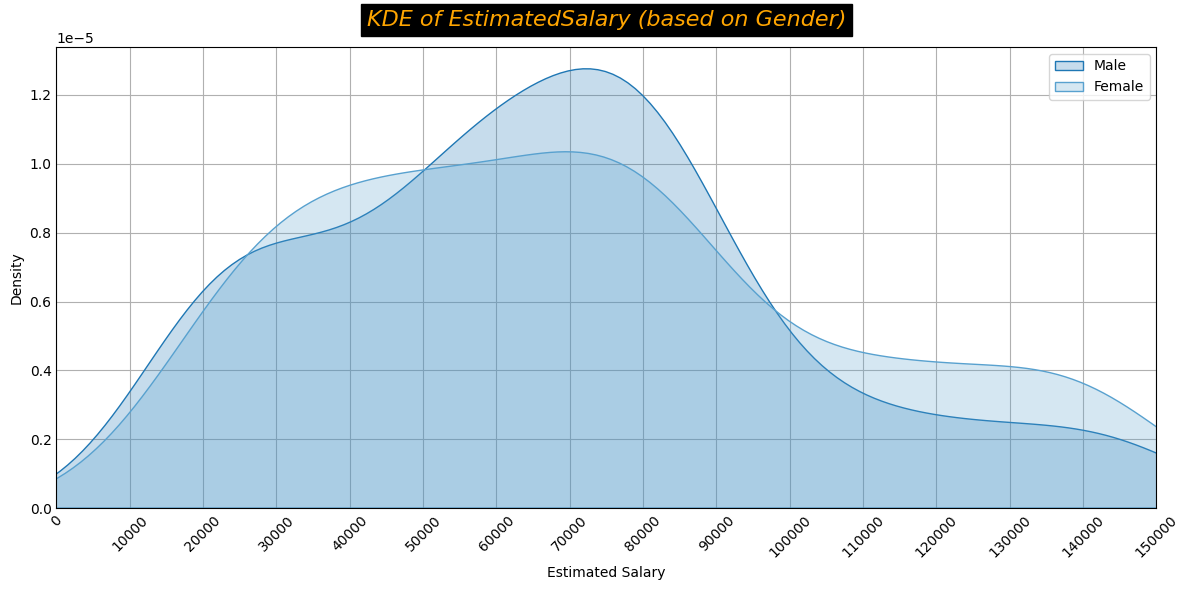

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# KDE plot of EstimatedSalary by Gender
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Gender'] == 0], x='EstimatedSalary', label='Male', shade=True)
sns.kdeplot(data=df[df['Gender'] == 1], x='EstimatedSalary', label='Female', shade=True)

plt.title('KDE of EstimatedSalary (based on Gender)', fontsize=16, style='italic', color='orange', backgroundcolor='black', pad=15)
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.xticks(np.arange(0, 160001, 10000), rotation=45)
plt.xlim(0, 150000)
plt.legend()
plt.tight_layout()
plt.show()


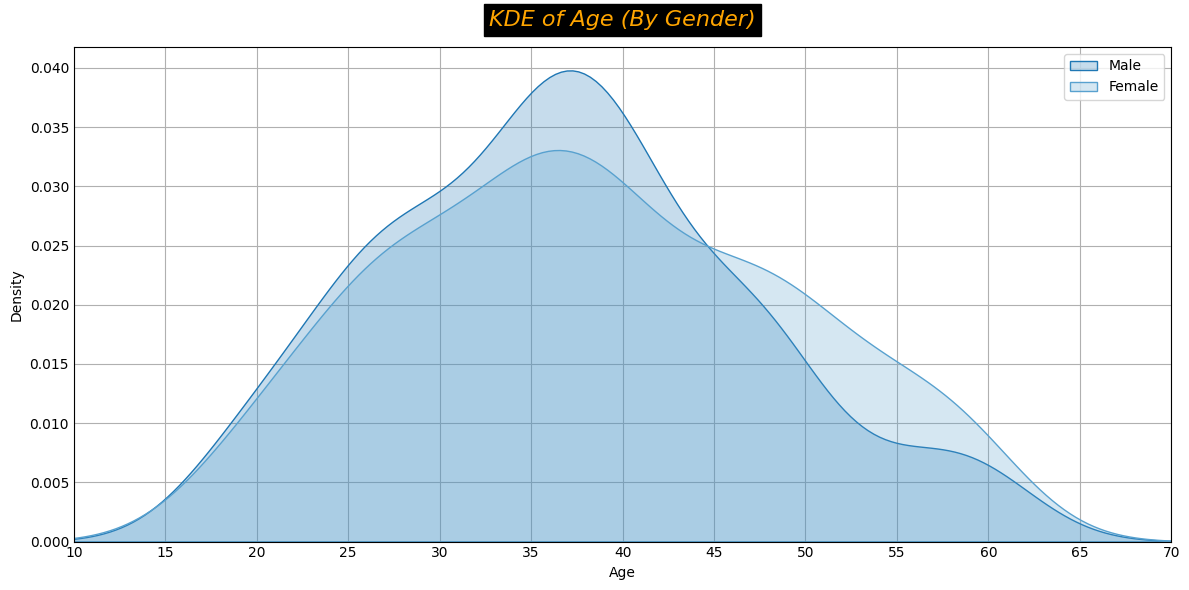

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# KDE plot of Age by Gender
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Gender'] == 0], x='Age', label='Male', shade=True)
sns.kdeplot(data=df[df['Gender'] == 1], x='Age', label='Female', shade=True)

plt.title('KDE of Age (By Gender)', fontsize=16, style='italic', color='orange', backgroundcolor='black', pad=15)
plt.xlabel('Age')
plt.ylabel('Density')
plt.xticks(np.arange(10, 71, 5))
plt.xlim(10, 70)
plt.legend()
plt.tight_layout()
plt.show()


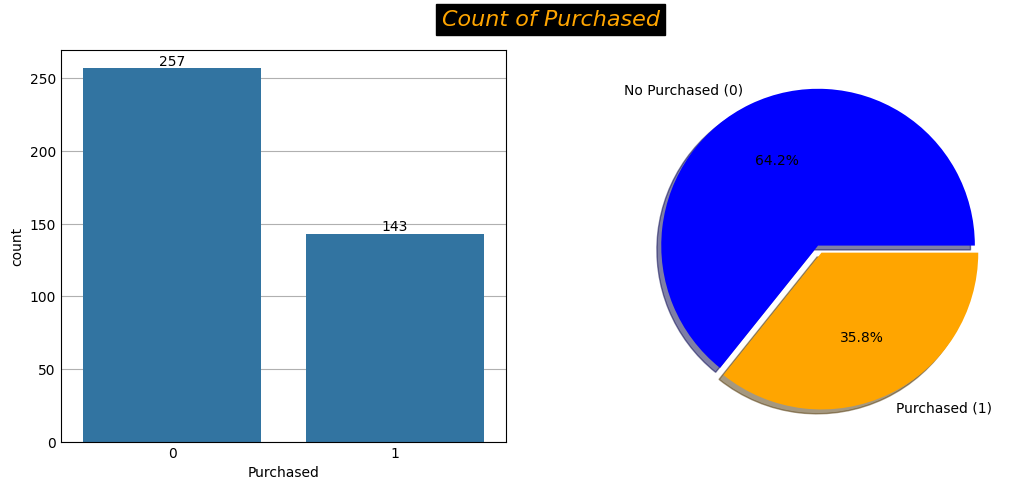

In [39]:
# count based on Purchased (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Purchased', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Purchased (pie chart)
slices = df.Purchased.value_counts().values
activities = ['No Purchased (0)', 'Purchased (1)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Purchased', y=1.09, **font)
plt.show()

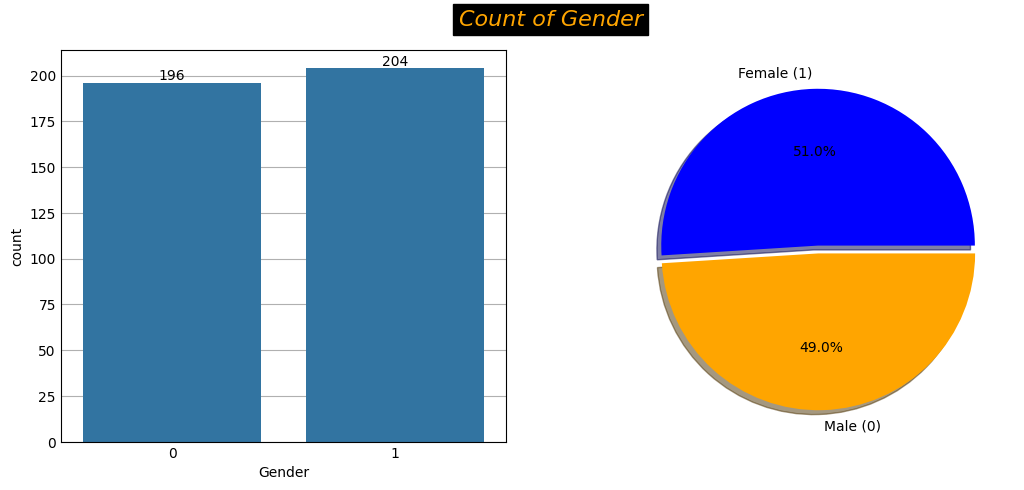

In [40]:
# count based on Gender (countplot)
fig, axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=df, x='Gender', ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)

# count based on Gender (pie chart)
slices = df.Gender.value_counts().values
activities = ['Female (1)', 'Male (0)']
axes[1].pie(slices, labels=activities, colors=['blue','orange'], shadow=True, explode=[0,0.05], autopct='%1.1f%%')

plt.suptitle('Count of Gender', y=1.09, **font)
plt.show()

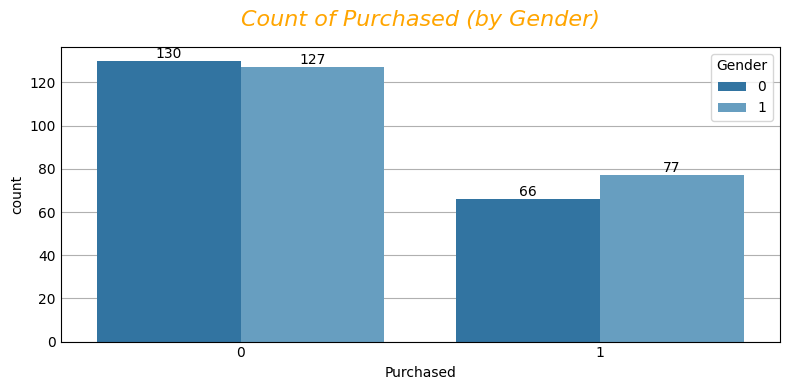

In [47]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='Purchased', hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Purchased (by Gender)', fontsize=16, fontstyle='italic', color='orange', pad=15)
plt.tight_layout()
plt.show()


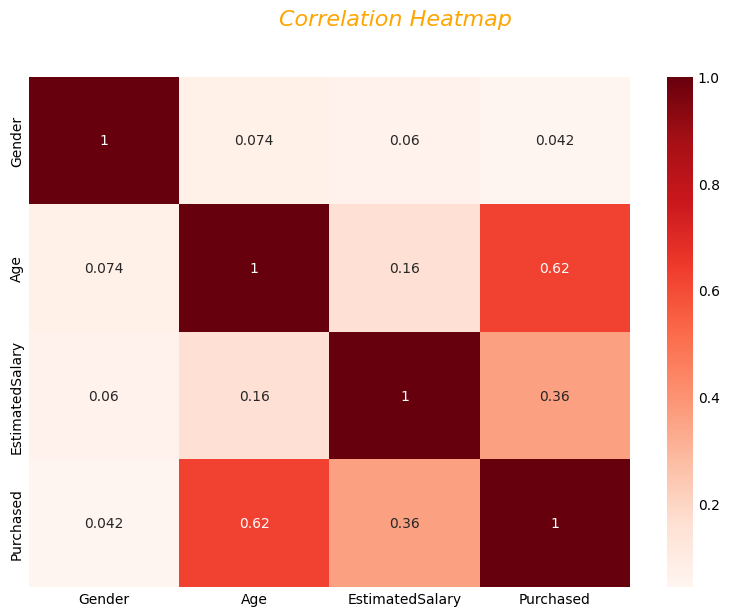

In [49]:
# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.suptitle('Correlation Heatmap', fontsize=16, fontstyle='italic', color='orange', y=1.02)
plt.tight_layout()
plt.show()


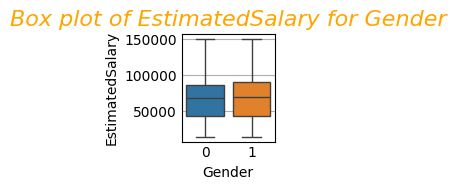

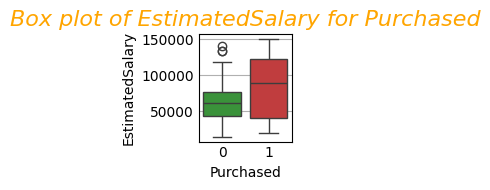

In [52]:
colors = {'Gender': ['#1f77b4', '#ff7f0e'], 'Purchased': ['#2ca02c', '#d62728']}
for col in ['Gender', 'Purchased']:
    sns.boxplot(data=df, x=col, y='EstimatedSalary', palette=colors[col])
    plt.title(f'Box plot of EstimatedSalary for {col}', fontsize=16, fontstyle='italic', color='orange')
    plt.tight_layout()
    plt.show()


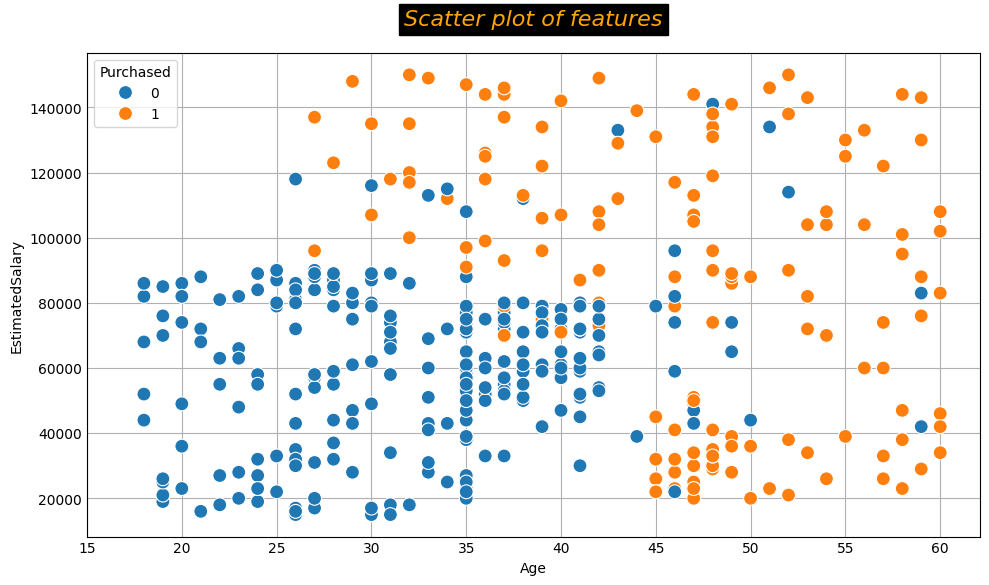

In [55]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

palette = {0: '#1f77b4', 1: '#ff7f0e'}
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased', palette=palette, s=100, edgecolor='white')
plt.title('Scatter plot of features', y=1.04, fontdict=font)
plt.xticks(np.arange(15, 65, 5))
plt.tight_layout()
plt.show()


In [56]:
fig = px.scatter_3d(
        data_frame=df,
        x='Age',
        y='EstimatedSalary',
        z='Gender',
        color='Purchased',
        template='ggplot2',
        opacity=0.6,
        height=700,
        title=f'3d scatter based on Age, EstimatedSalary, Gender and Purchased'
)

pio.show(fig)

In [57]:
# check mean of EstimatedSalary based on Gender and Purchased
results = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='EstimatedSalary')
results.style.background_gradient(cmap='summer_r')

Gender,0,1
Purchased,,
0,59630.769231,61480.314961
1,83424.242424,88714.285714


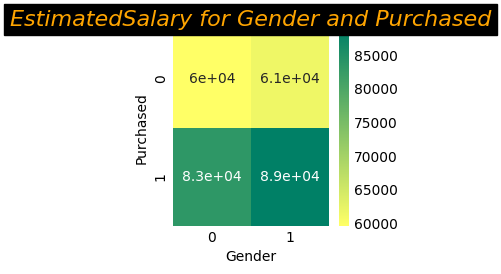

In [58]:
# show result in heatmap
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('EstimatedSalary for Gender and Purchased', y=1.09, x=0.4, **font)
plt.show()

In [59]:
# check mean of Age based on Gender and Purchased
results = pd.pivot_table(data=df, index='Purchased', columns='Gender', values='Age')
results.style.background_gradient(cmap='summer_r')

Gender,0,1
Purchased,,
0,32.484615,33.110236
1,45.500000,47.155844


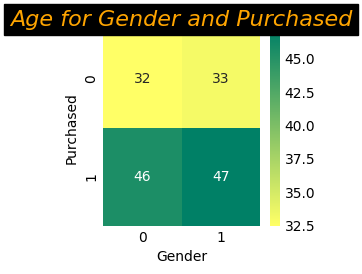

In [60]:
# show result in heatmap
sns.heatmap(results, cmap='summer_r', annot=True)
plt.suptitle('Age for Gender and Purchased', y=1.09, x=0.4, **font)
plt.show()

In [33]:
# Our dataset we use for modeling
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [37]:
# standardize EstimatedSalary and Age with StandardScaler
df2 = df.copy()
scaler = MinMaxScaler(feature_range=(18,60)).fit(df[['EstimatedSalary']])
df2['EstimatedSalary'] = scaler.transform(df2['EstimatedSalary'].values.reshape(-1,1))
df2

C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19.244444,0
1,15810944,1,35,19.555556,0
2,15668575,0,26,26.711111,0
3,15603246,0,27,31.066667,0
4,15804002,1,19,36.977778,0
...,...,...,...,...,...
395,15691863,0,46,26.088889,1
396,15706071,1,51,20.488889,1
397,15654296,0,50,19.555556,1
398,15755018,1,36,23.600000,0


In [40]:
# define x (features) and y (target)
x = np.asanyarray(df2.drop('Purchased', axis=1))
y = df2.Purchased.values.reshape(-1,1)

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    jaccard_score, roc_curve, f1_score,
    precision_score, recall_score, accuracy_score
)

# Clear previous lists if rerunning
ACC_test, ACC_train, F1, Recall, Precision = [], [], [], [], []
FPR0, TPR0, FPR1, TPR1 = [], [], [], []

def modeling(x, y, test_size, classes, is_add=1):
    from sklearn.model_selection import train_test_split
    
    # Split data to train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    print(20*'-', 'Shape', 20*'-')
    print(f"x_train: {x_train.shape}")
    print(f"y_train: {y_train.shape}")
    print(f"x_test: {x_test.shape}")
    print(f"y_test: {y_test.shape}")
    
    # Define and fit Logistic Regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(x_train, y_train.ravel())

    # Predictions
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    y_proba_test = clf.predict_proba(x_test)

    # Metrics
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # Append metrics
    if is_add:
        ACC_test.append(acc_test)
        ACC_train.append(acc_train)
        Precision.append(precision)
        Recall.append(recall)
        F1.append(f1)

        fpr1, tpr1, _ = roc_curve(y_test, y_proba_test[:, 1])
        fpr0, tpr0, _ = roc_curve(y_test, y_proba_test[:, 0])
        FPR1.append(fpr1)
        TPR1.append(tpr1)
        FPR0.append(fpr0)
        TPR0.append(tpr0)

  # Confusion Matrix
  
    print('-'*20 , 'Confusion Matrix', '-'*20)
    cm = confusion_matrix(y_test, y_pred_test)
    print(cm)
    plot_confusion_matrix(cm, classes, title='Confusion Matrix')
    print('-'*20 , 'Classification Report', '-'*20)
    print(classification_report(y_test, y_pred_test, target_names=classes))
    print(f"Jaccard Score: {jaccard_score(y_test, y_pred_test):.2f}\n")

    # Plot metrics and ROC curves
    plot_results(FPR0, TPR0, FPR1, TPR1, ACC_test, ACC_train, Recall, Precision, F1)

    return clf, acc_test, acc_train


In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title, fontsize=14)
    plt.ylabel('Actual', fontsize=12)
    plt.xlabel('Predicted', fontsize=12)
    plt.tight_layout()
    plt.show()


-------------------- Shape --------------------
x_train: (320, 4)
y_train: (320, 1)
x_test: (80, 4)
y_test: (80, 1)
-------------------- Confusion Matrix --------------------
[[56  2]
 [ 5 17]]


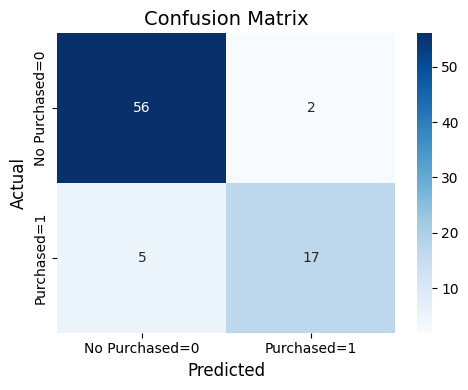

-------------------- Classification Report --------------------
                precision    recall  f1-score   support

No Purchased=0       0.92      0.97      0.94        58
   Purchased=1       0.89      0.77      0.83        22

      accuracy                           0.91        80
     macro avg       0.91      0.87      0.89        80
  weighted avg       0.91      0.91      0.91        80

Jaccard Score: 0.71



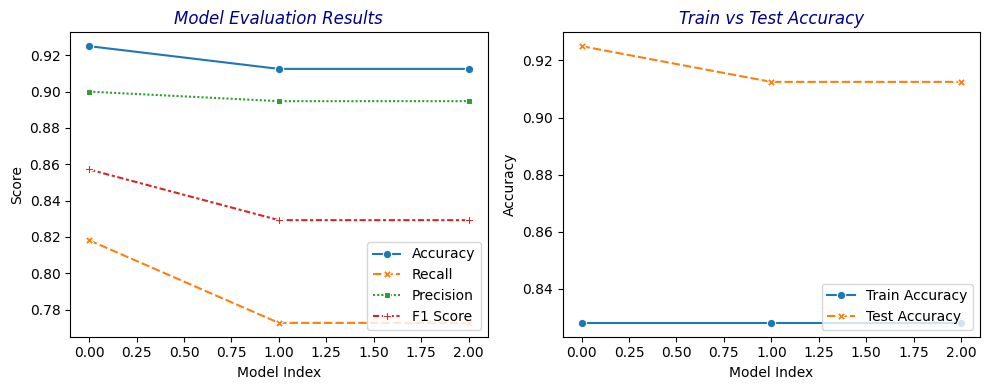

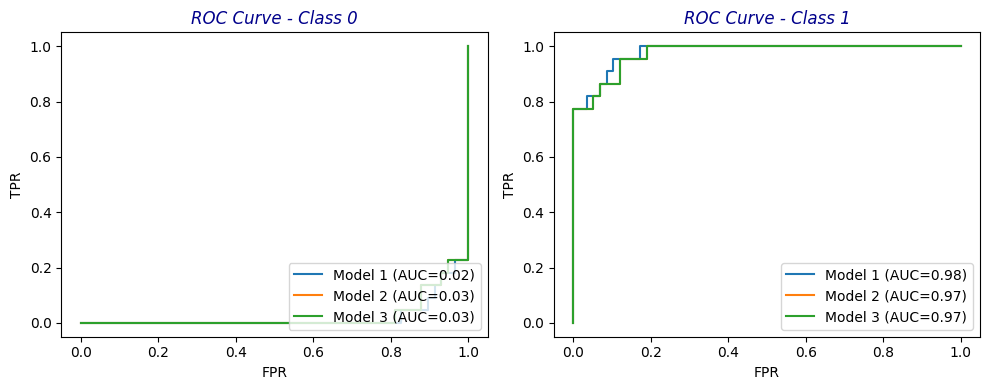

In [43]:
clf1, acc_test1, acc_train1 = modeling(x, y, 0.2, ['No Purchased=0', 'Purchased=1'])


In [111]:
# 📌 Add this to the top of your notebook (if not already present)
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# 🔁 Split the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 📌 Concatenate test features and true labels
x_test_with_label = np.concatenate((x_test, y_test), axis=1)
x_test_with_label = pd.DataFrame(x_test_with_label, columns=['Gender', 'Age', 'EstimatedSalary', 'Purchased'])

# 🧠 Predict using the model
predictions = clf1.predict(x_test)

# 🎨 Plotting the 3D Scatter
fig = px.scatter_3d(
    data_frame=x_test_with_label,
    x='Age',
    y='EstimatedSalary',
    z='Purchased',
    color=predictions.astype(str),  # converting labels to strings for color mapping
    color_discrete_map={'0': 'red', '1': 'green'},
    template='ggplot2',
    opacity=0.6,
    height=700,
    title=f'Visualization of clf1 Predictions (Green=1, Red=0)'
)

pio.show(fig)


In [115]:
# 💡 Fit final logistic model on all data
final_model = LogisticRegression(max_iter=1000)
final_model.fit(x, y.ravel())

# 🆕 New sample input (example: Female (0), Age: 18, Salary: 70000)
new_sample = pd.DataFrame({'Gender': [0], 'Age': [48], 'EstimatedSalary': [70000]})

print(f"Gender: {new_sample['Gender'].values[0]}")
print(f"Age: {new_sample['Age'].values[0]}")
print(f"EstimatedSalary: {new_sample['EstimatedSalary'].values[0]}")

# ✅ Scale EstimatedSalary if required (assuming you used StandardScaler)
new_sample[['EstimatedSalary']] = scaler.transform(new_sample[['EstimatedSalary']])
# If you scaled Age too, apply that similarly

# 📊 Predict
ns = np.asarray(new_sample)
result = final_model.predict(ns)
proba = final_model.predict_proba(ns)

print('=' * 38)
print(f"Predicted class: {result[0]} ({'Purchased' if result[0]==1 else 'Not Purchased'})")
print(f"Probability of Purchase: {proba[0][1]:.2f}")
print(f"Probability of No Purchase: {proba[0][0]:.2f}")


Gender: 0
Age: 48
EstimatedSalary: 70000
Predicted class: 1 (Purchased)
Probability of Purchase: 0.81
Probability of No Purchase: 0.19


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
df = pd.read_csv(r"C:\Users\Acer\Desktop\Project\customer_behaviour.csv") 

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# ✅ Feature matrix and target
x = df[['Gender', 'Age', 'EstimatedSalary']].values
y = df[['Purchased']].values

# ✅ Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# ✅ Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [8]:
import tensorflow as tf

# Define a simple model
model = Sequential([
    Dense(16, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # output layer for binary classification
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


C:\Users\Acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/50


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4183 - loss: 0.7061 - val_accuracy: 0.3125 - val_loss: 0.7254
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3955 - loss: 0.6878 - val_accuracy: 0.3125 - val_loss: 0.6911
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4315 - loss: 0.6550 - val_accuracy: 0.5781 - val_loss: 0.6504
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5993 - loss: 0.6396 - val_accuracy: 0.7969 - val_loss: 0.6105
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7802 - loss: 0.6123 - val_accuracy: 0.8281 - val_loss: 0.5764
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8318 - loss: 0.5736 - val_accuracy: 0.8906 - val_loss: 0.5437
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7959 - loss: 0.5761 - val_accuracy: 0.9219 - val_loss: 0.5143
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8756 - loss: 0.5253 - val_accuracy: 0.9375 - val_loss: 0.4861
Ep

In [10]:
# Predict probabilities
y_pred_proba = model.predict(x_test)

# Convert to binary class (0 or 1)
y_pred = (y_pred_proba > 0.5).astype(int)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


[[55  3]
 [ 1 21]]
              precision    recall  f1-score   support

 No Purchase       0.98      0.95      0.96        58
   Purchased       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



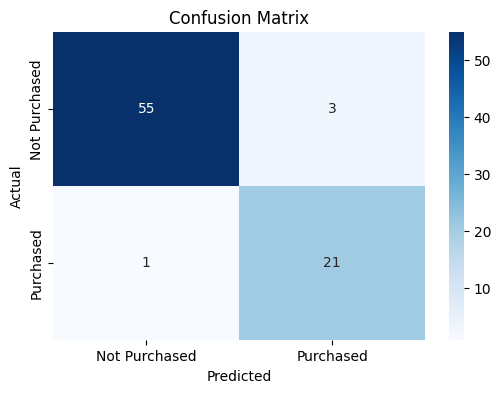

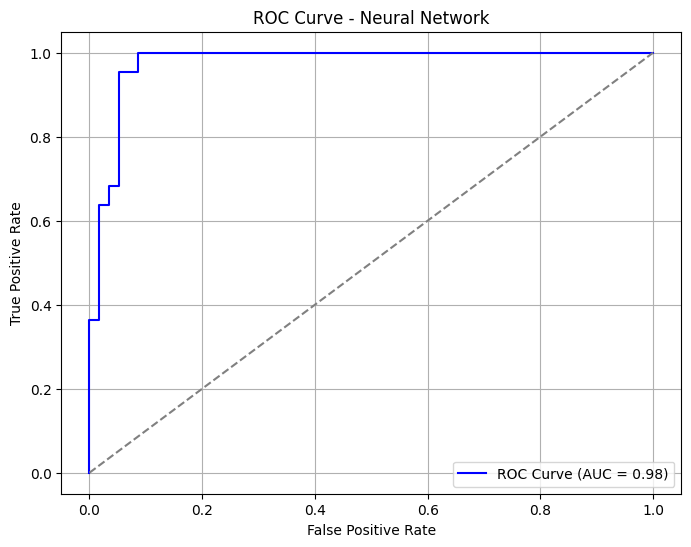

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['No Purchase', 'Purchased']))


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Purchased", "Purchased"], yticklabels=["Not Purchased", "Purchased"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# ✅ Step 3: Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



In [20]:
# ✅ New Sample (important: as a NumPy array)
import numpy as np
new_sample = np.array([[1, 48, 70000]])  # Male, Age 48, Salary 60000
new_sample_scaled = scaler.transform(new_sample)

# ✅ Predict
nn_result = model.predict(new_sample_scaled)

print(f"🔮 Probability of Purchase: {nn_result[0][0]:.2f}")
print("✅ Predicted Class:", "Purchased" if nn_result[0][0] > 0.5 else "Not Purchased")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
🔮 Probability of Purchase: 0.72
✅ Predicted Class: Purchased
